# The approach I saw on the internet


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import math

In [3]:
df = pd.read_csv('STOCK_VAL.csv')
training_data = df.iloc[:, 4:5].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_data)

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.5))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=50))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=30,batch_size=32)

In [10]:
dataset_test = pd.read_csv("STOCK_VAL_NEW.csv")
real_stock_price = dataset_test.iloc[:, 4:5].values
dataset_total = pd.concat((df['OPEN'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
for i in range(len(inputs)):
    inputs[i]  = float(str(inputs[i]).replace(',',''))
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
print(len(inputs))

94


In [ ]:
for i in range(60, 94):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

for i in range(len(real_stock_price)):
    real_stock_price[i]  = float(str(real_stock_price[i][0]).replace(',',''))

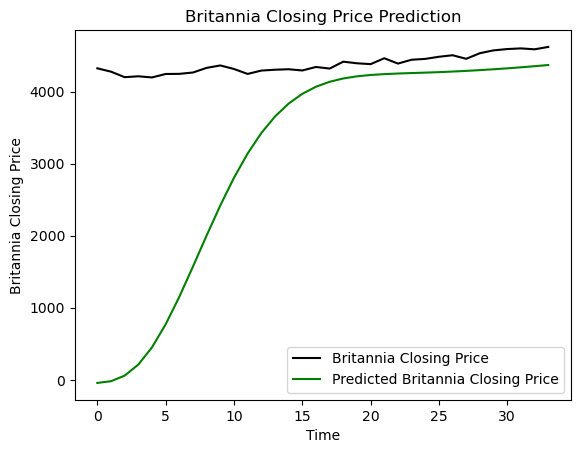

3782699.0655465196
50976.92340069671


In [13]:
plt.plot(real_stock_price[:, 0], color = 'black', label = 'Britannia Closing Price')
plt.plot(predicted_stock_price[:, 0], color = 'green', label = 'Predicted Britannia Closing Price')
plt.title('Britannia Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Britannia Closing Price')
plt.legend()
plt.show()

mse_val = ((real_stock_price[:, 0] - predicted_stock_price[:, 0])**2).mean(axis=None)
mse_again = ((real_stock_price[15:, 0] - predicted_stock_price[15:, 0])**2).mean(axis=None)

print(mse_val)
print(mse_again)

# My Intuitive Approach

In [147]:
days_used = 5


Ytrain = np.array(df['CLOSE'])
training_Y = Ytrain[:days_used]
training_Y = training_Y.reshape(-1, 1)
training_X = np.array([-i for i in range(days_used)])
training_X = training_X.reshape(-1, 1)


In [148]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(training_X[1:], training_Y[1:])
reg.score(training_X, training_Y)

-1.3629583262374907

In [149]:
dataset_test = pd.read_csv("STOCK_VAL_NEW.csv")

real_stock_price = dataset_test.iloc[:, 4:5].values
preds = []
for i in range(1, 35):
    preds.append(reg.predict([[i]])[0][0])

predicted_stock_price = np.array(preds)


for i in range(len(real_stock_price)):
    real_stock_price[i]  = float(str(real_stock_price[i][0]).replace(',',''))

real_stock_price = np.array([real_stock_price[-(i+1)][0] for i in range(len(real_stock_price))])

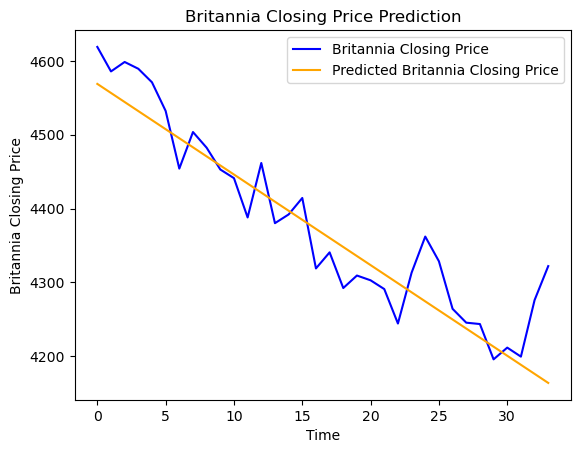

2368.150213235352


In [150]:
plt.plot(real_stock_price, color = 'blue', label = 'Britannia Closing Price')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicted Britannia Closing Price')
plt.title('Britannia Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Britannia Closing Price')
plt.legend()
plt.show()

mse_val = ((real_stock_price - predicted_stock_price)**2).mean(axis=None)

print(mse_val)